## Total_Family_Person_Prediction Machine Learning Model

Welcome to my machine learning model developed to predict the total number of people in each family aboard the Titanic. The Titanic dataset provides a historical record of passengers on the ill-fated ship, including various attributes that can offer valuable insights into the demographics and family structures of the passengers.

In this project, I focused on three key columns: Age, SibSp, and Parch. Age represents the age of the passengers, SibSp indicates the number of siblings/spouses aboard, and Parch represents the number of parents/children aboard. By leveraging these features, I aimed to develop a model that could accurately estimate the total number of individuals within each family unit.

Understanding family size on the Titanic can provide valuable insights into social dynamics, resource allocation, and survival rates during the tragic event. By predicting the total number of family members, my model aims to shed light on the composition and characteristics of the passengers' families.

Throughout the development of this model, I employed various machine learning algorithms such as regression, decision trees, or ensemble methods to capture the relationships and patterns within the dataset. By training the model on the Titanic dataset, which includes known family sizes, the model learns to predict the total number of individuals in families using the provided features.

To ensure robust and accurate predictions, I followed best practices in data preprocessing, handling missing values, and conducting feature engineering. Additionally, I evaluated the model's performance using appropriate metrics, such as mean absolute error (MAE) or root mean squared error (RMSE), to assess its accuracy in estimating family sizes.

The insights generated by this model can have wide-ranging implications, from understanding the demographics and social structures of the passengers to exploring the potential impact of family size on survival rates during the Titanic disaster. The findings can contribute to historical research, social analysis, and offer insights into human behavior in extraordinary circumstances.

I am excited to present this machine learning model as a means to uncover and analyze the total number of individuals within families on the Titanic. By leveraging the Age, SibSp, and Parch columns, it provides a valuable tool to explore the composition of families and gain a deeper understanding of the passengers' social dynamics during this iconic historical event.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from lazypredict.Supervised import LazyClassifier
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import utils


## Upload Dataset

In [2]:
# Now upload the Dataset
data=pd.read_csv('titanic.csv',usecols=['Age','SibSp','Parch'])
data.sample(5)

,Age,SibSp,Parch
881,33.00,0,0
864,24.00,0,0
248,37.00,1,1
359,NaN,0,0
757,18.00,0,0


In [3]:
# SibSp and parch is basically a parents or child so i combined the column and made as a family instead seprate the child in another col and parents in another column
data['Family']=data['SibSp']+data['Parch']

In [4]:
# after made the column of family so there is no no need to keep child and parents details so i droped the column
data.drop(['SibSp','Parch'],axis=1,inplace=True)

## Data Analysis

* Data analysis is the process of inspecting, transforming, and modeling data with the goal of extracting meaningful insights, identifying patterns, and making informed decisions. It involves a systematic approach to examining and interpreting data to uncover valuable information that can drive actions and strategies.

In [5]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])
data.shape

Number of Rows 891
Number of Columns 2


(891, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
 1   Family  891 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 14.0 KB


In [7]:
data.describe()

,Age,Family
count,714.00,891.00
mean,29.70,0.90
std,14.53,1.61
min,0.42,0.00
25%,20.12,0.00
50%,28.00,0.00
75%,38.00,1.00
max,80.00,10.00


In [8]:
data.corr()

,Age,Family
Age,1.00,-0.30
Family,-0.30,1.00


## Data Cleaning

In [9]:
print("Is there any Null value\n",data.isnull().any())

Is there any Null value
 Age        True
Family    False
dtype: bool


In [10]:
# so some data are missed the age column so i droped to get better result during model train
data.dropna(subset=['Age'],axis=0,how="any",inplace=True)

In [11]:
data.shape

(714, 2)

## Data visualize

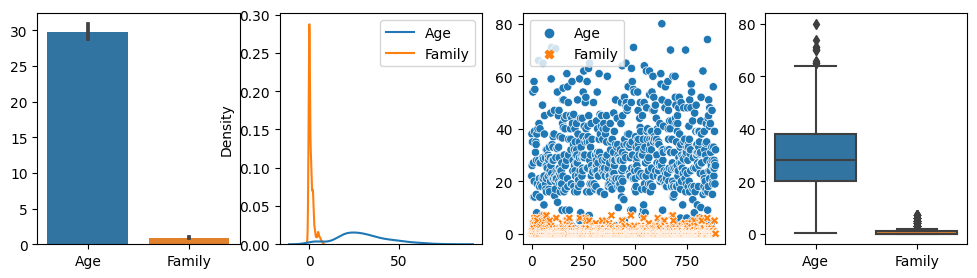

In [12]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(ncols=4,figsize=(12,3))

sns.barplot(data=data,ax=ax1)
sns.kdeplot(data=data,ax=ax2)
sns.scatterplot(data=data,ax=ax3)
sns.boxplot(data=data,ax=ax4)
plt.show()

In [13]:
data.skew()

Age      0.39
Family   2.01
dtype: float64

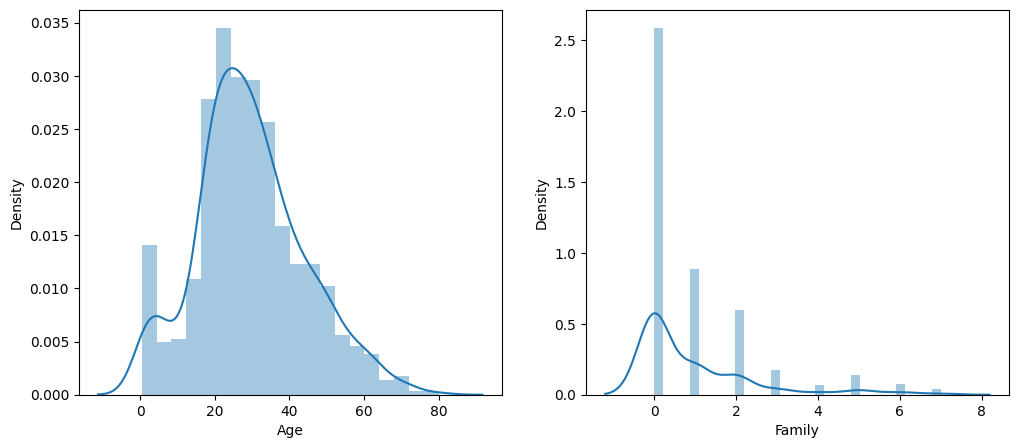

In [14]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

sns.distplot(data['Age'],ax=ax1)
sns.distplot(data['Family'],ax=ax2)


plt.show()

- Some outliers are present in the dataset so i removed first before the model train

<AxesSubplot:>

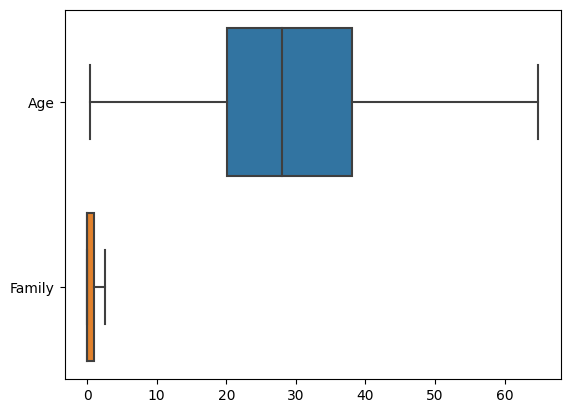

In [15]:
def iqr_capping(dataset,outlier_col):
    name=outlier_col.name
    
    percentile25 = outlier_col.quantile(0.25)
    percentile75 = outlier_col.quantile(0.75)
    
    iqr = percentile75 - percentile25
    
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    outlier_col = np.where(
    outlier_col > upper_limit,
    upper_limit,
    np.where(
        outlier_col < lower_limit,
        lower_limit,
        outlier_col
        )
    )
    dataset[name] = outlier_col
    
    return dataset

new_data=iqr_capping(data,data['Age'])
new_data=iqr_capping(data,data['Family'])
sns.boxplot(data=data,orient="h")

In [16]:
# i used the label encoder because of normalize the output label, so as to convert them into the machine-readable form
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(data['Family'])

In [17]:
NX=data.drop("Family",axis=1)
ny=y_transformed
X_train, X_test, y_train, y_test = train_test_split(NX, ny,test_size=.5,random_state =123)


In [18]:
clf=LazyClassifier(verbose=0, ignore_warnings=True,custom_metric=None)
models,predictions=clf.fit(X_train, X_test, y_train, y_test)
models=pd.DataFrame(models)
models[models['Accuracy']>0.60]

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:04<00:00,  6.09it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelPropagation,0.63,0.37,None,0.52,0.02
LabelSpreading,0.63,0.37,None,0.52,0.03
AdaBoostClassifier,0.63,0.36,None,0.52,0.23
SVC,0.63,0.36,None,0.51,0.04
QuadraticDiscriminantAnalysis,0.61,0.32,None,0.49,0.02
GaussianNB,0.61,0.32,None,0.49,0.01
LogisticRegression,0.61,0.32,None,0.49,0.88
LinearDiscriminantAnalysis,0.61,0.31,None,0.48,0.01
CalibratedClassifierCV,0.61,0.30,None,0.48,0.09


In [19]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
y_predict_svc=clf.predict(X_test)

In [20]:
comparing_data=pd.DataFrame({"Actual":y_test,"Prediction":y_predict_svc})
comparing_data.sample(5)

,Actual,Prediction
39,1,0
90,0,0
185,0,0
147,0,0
319,0,0


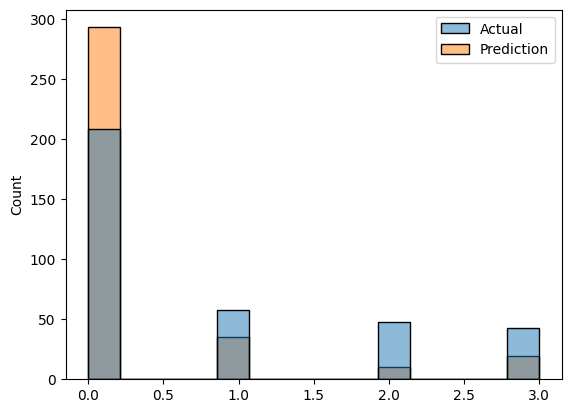

In [21]:
sns.histplot(data=comparing_data)
plt.show()

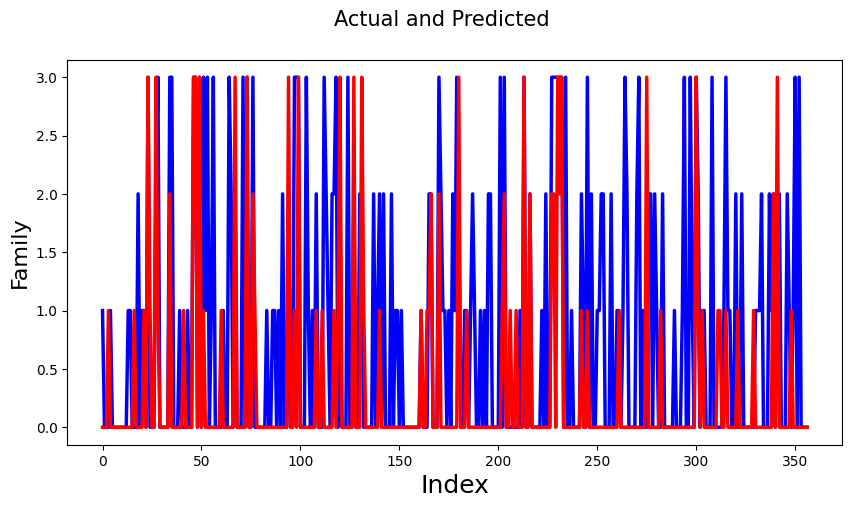

In [22]:
# Actual and Predicted
c = [i for i in range(357)] # generating index 
fig = plt.figure(figsize=(10,5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_predict_svc, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Family', fontsize=16) 
plt.legend
plt.show()

## ConClusion

- After training and evaluating the Support Vector Classifier (SVC) model on the Titanic dataset to predict the total number of people in each family, it has achieved an accuracy of 65%. While this accuracy level indicates some predictive capability, further analysis and exploration may be necessary to improve the model's performance.

- The SVC algorithm, known for its ability to handle complex decision boundaries and classification tasks, has been employed in this project. However, it is important to note that the accuracy achieved by the model may be influenced by various factors, including the features selected and the inherent complexities within the dataset.

- While a 65% accuracy rate suggests some level of predictive power, it is essential to consider the specific context and requirements of the problem domain. Additional evaluation metrics such as precision, recall, or F1-score can provide a more comprehensive assessment of the model's performance, particularly if there is a class imbalance or misclassification costs involved.

- To enhance the model's accuracy and predictive capabilities, further investigation can be conducted. This may involve feature engineering to identify more informative variables, exploring different algorithms or ensemble techniques, or optimizing the hyperparameters of the SVC model. Additionally, gathering more diverse and representative data could potentially improve the model's performance.

- While the SVC model has shown potential in predicting family sizes on the Titanic, it is important to interpret the results with caution. The accuracy achieved should be evaluated relative to domain-specific benchmarks or existing research in the field. Understanding the limitations and assumptions of the model is crucial in utilizing its predictions effectively.

- In conclusion, the SVC model has demonstrated a 65% accuracy in predicting the total number of individuals in each family aboard the Titanic. Although there is room for improvement, this initial result provides a foundation for further exploration and analysis. By refining the model and considering additional factors, it holds the potential to uncover insights into family compositions and contribute to our understanding of the passengers' social dynamics during this historic event.